Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.2.1     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [3]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [4]:
glimpse(diabetes_train)
(diabetes_train |> sample_n(10))
(diabetes_test |> sample_n(10))

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 4, 1, 3, 8, 1, 13, 5, 5, 3, 10, 4, 1…
$ Glucose                  <dbl> 85, 89, 116, 110, 103, 126, 99, 97, 145, 117,…
$ BloodPressure            <dbl> 66, 66, 74, 92, 30, 88, 84, 66, 82, 92, 75, 5…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 41, 0, 15, 19, 0, 26, 11, 3…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 235, 0, 140, 110, 0, 0, 54, …
$ BMI                      <dbl> 26.6, 28.1, 25.6, 37.6, 43.3, 39.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.191, 0.183, 0.704, 0.3…
$ Age                      <dbl> 31, 21, 30, 30, 33, 27, 50, 22, 57, 38, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,99,70,16,44,20.4,0.235,27,0
5,147,75,0,0,29.9,0.434,28,0
8,176,90,34,300,33.7,0.467,58,1
2,92,76,20,0,24.2,1.698,28,0
9,89,62,0,0,22.5,0.142,33,0
10,94,72,18,0,23.1,0.595,56,0
1,113,64,35,0,33.6,0.543,21,1
5,155,84,44,545,38.7,0.619,34,0
1,82,64,13,95,21.2,0.415,23,0


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,189,104,25,0,34.3,0.435,41,1
0,146,82,0,0,40.5,1.781,44,0
6,119,50,22,176,27.1,1.318,33,1
3,182,74,0,0,30.5,0.345,29,1
3,89,74,16,85,30.4,0.551,38,0
12,140,82,43,325,39.2,0.528,58,1
0,129,80,0,0,31.2,0.703,29,0
0,78,88,29,40,36.9,0.434,21,0
1,151,60,0,0,26.1,0.179,22,0


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

Variable that is suitable as the "outcome" in a logistic regression model, is `Outcome`. From the sample data, it seems like the bariable `Outcome` is used to code whether someone has diabetes or not using value `0` and `1`

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

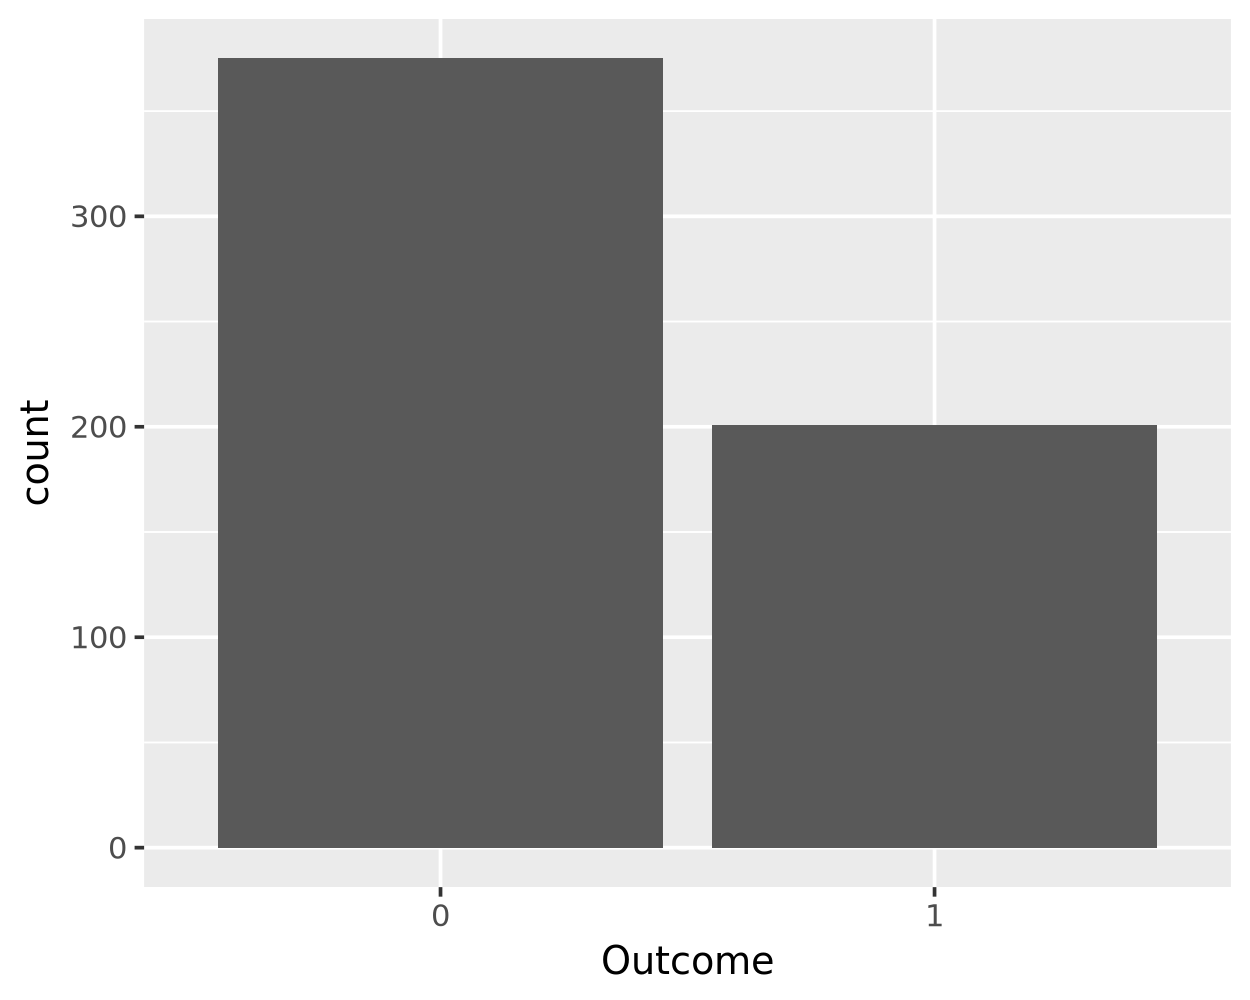

In [5]:
ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

In [6]:
(diabetes_train |> count(Outcome))

Outcome,n
<fct>,<int>
0,375
1,201


Data is imbalanced, 0 with 375 count and 1 with 201

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [7]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

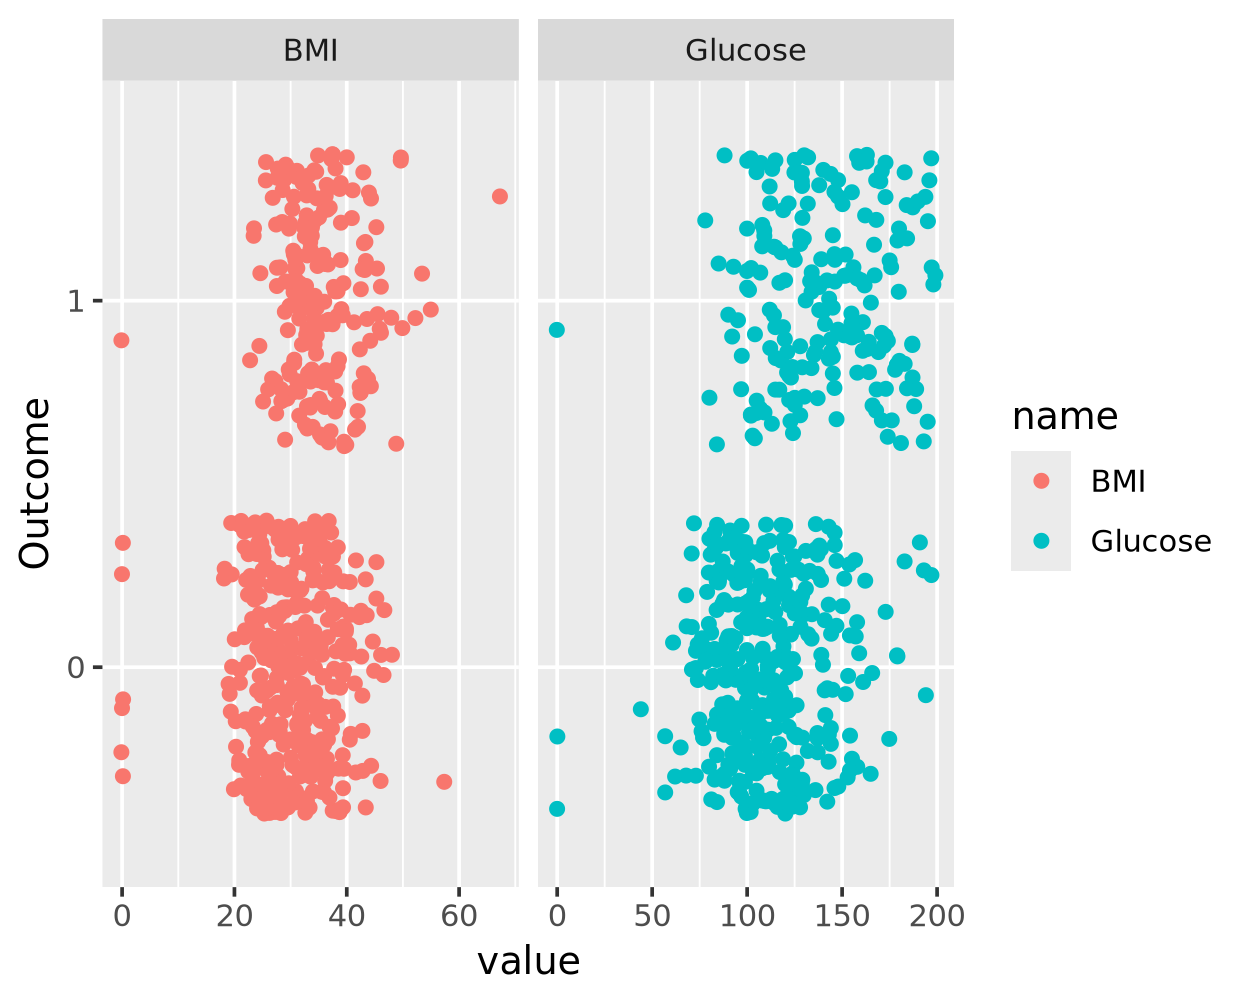

In [8]:
ggplot(plot_df, aes(x = value, y = Outcome, color = name)) +
  geom_jitter(width = 0.2) +
  facet_wrap(~name, ncol = 2, scales = 'free_x')

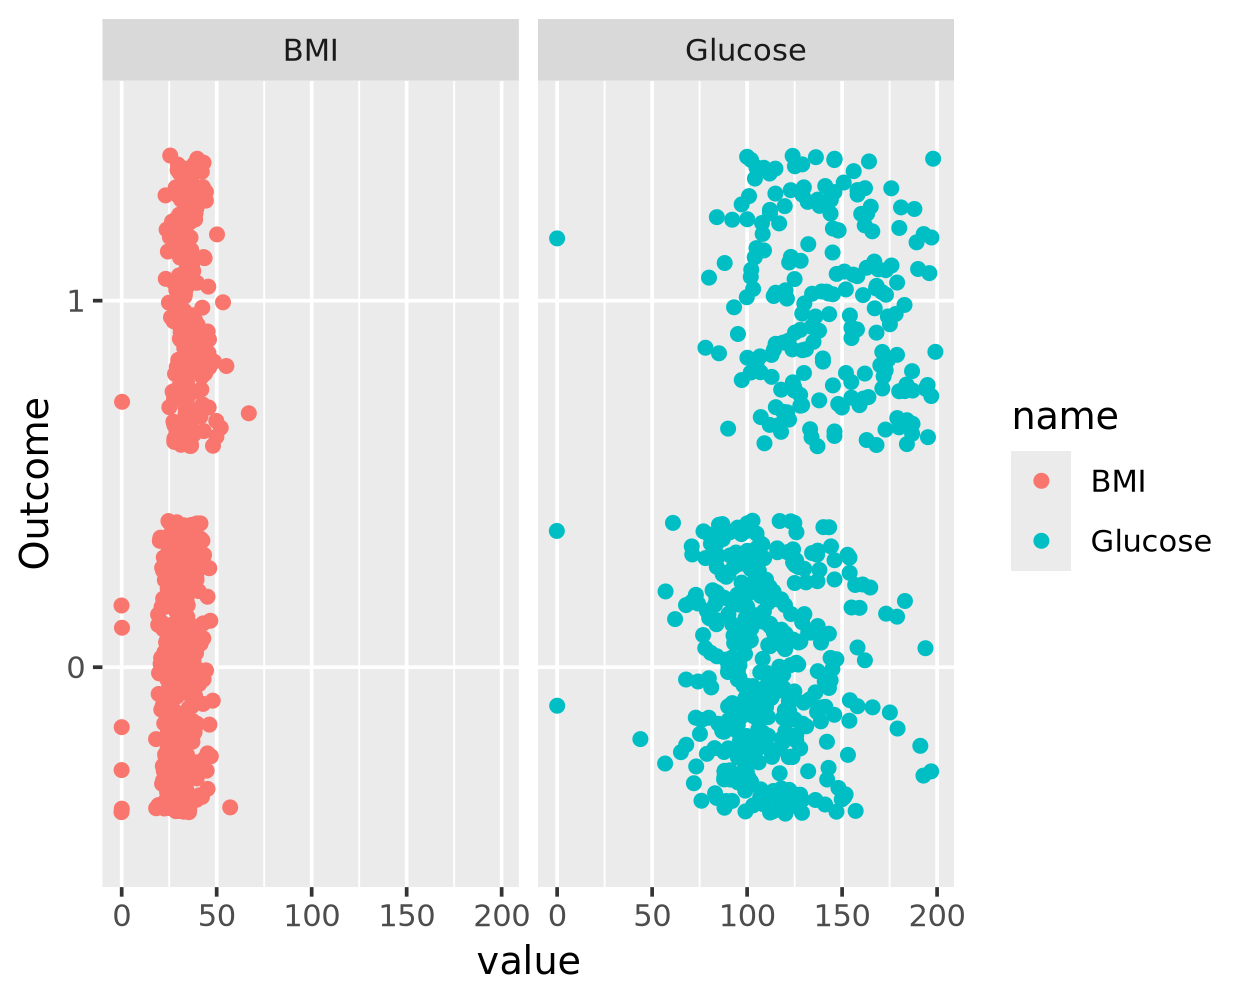

In [9]:
ggplot(plot_df, aes(x = value, y = Outcome, color = name)) +
  geom_jitter(width = 0.2) +
  facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

From the sample charts above, we can see that **by removing scales = 'free_x', the X coordinate is no longer scaled up or down based on the existing data**. Instead, it uses the highest limit from the sample for both charts.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [10]:
mod <- logistic_reg() |> set_engine('glm')
mod_fit <- mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.89197599,0.724104371,-10.898948,1.165974e-27
BMI,0.08717502,0.016010901,5.444729,5.188422e-08
Glucose,0.03542733,0.003806943,9.305978,1.327649e-20


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [11]:
diabetes_test_wPred <- augment(mod_fit, diabetes_test)
diabetes_test_wPred |> sample_n(10)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.8739084,0.12609156,3,113,44,13,0,22.4,0.140,22,0
0,0.8486896,0.15131044,0,86,68,32,0,35.8,0.238,25,0
0,0.9052256,0.09477440,11,85,74,0,0,30.1,0.300,35,0
0,0.9062384,0.09376163,1,95,74,21,73,25.9,0.673,36,0
0,0.7213743,0.27862571,7,81,78,40,48,46.7,0.261,42,0
0,0.5511809,0.44881907,1,121,78,39,74,39.0,0.261,28,0
0,0.9084834,0.09151658,2,94,68,18,76,26.0,0.561,21,0
0,0.6527001,0.34729993,2,124,68,28,205,32.9,0.875,30,1
0,0.8959478,0.10405217,3,99,54,19,86,25.6,0.154,24,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [12]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 108  32
         1  17  35

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

From the table:
108 = True Positives (TP) (Predicted Yes, Actually Yes) <br />
32 = False Positives (FP) (Predicted Yes, Actually No) <br />
17 = False Negatives (FN) (Predicted No, Actually Yes) <br />
35 = True Negatives (TN) (Predicted No, Actually No) <br />

1. TP + FN -> 108 + 17 = 125
2. This is taken from value of TruePositive for whom have diabetes and actually had it, which is 108
3. It's translated as False Positive, 32
